# Telco Customer Churn
## Focused customer retention programs
<br>
<br>

Telco Customer Churn Prediction is to measure why customers are leaving Telco Business.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import plotly.express as px
from scipy import stats
from typing import List
import os

In [3]:
print(os.listdir('../project/Telco Customer Churn'))

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [4]:
df = pd.read_csv('../project/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5609,4818-DRBQT,Male,0,Yes,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.15,2265.25,Yes
4620,8513-OLYGY,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.80,8332.15,No
1101,4712-UYOOI,Female,0,Yes,Yes,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.00,417.65,No
7002,9586-JGQKH,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.40,6794.75,No
6873,6369-MCAKO,Female,0,Yes,Yes,68,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),89.05,6185.8,No


In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

## **1. Exploratory Data Analysis**

### 1.1 Overview
* `customerID` is the unique id of the row and it doesn't have any effect on target
* `gender` Whether the customer is a male or a female
* `SeniorCitizen` Whether the customer is a senior citizen or not (1, 0)
* `Partner` Whether the customer has a partner or not (Yes, No)
* `Dependents` Whether the customer has dependents or not (Yes, No)
* `Tenure` Number of months the customer has stayed with the company
* `PhoneService` Whether the customer has a phone service or not (Yes, No)
* `MultipleLines` Whether the customer has multiple lines or not (Yes, No, No phone service)
* `InternetService` Customer’s internet service provider (DSL, Fiber optic, No)
* `OnlineSecurity` Whether the customer has online security or not (Yes, No, No internet service)
* `OnlineBackup` Whether the customer has online backup or not (Yes, No, No internet service)
* `DeviceProtection` Whether the customer has device protection or not (Yes, No, No internet service)
* `TechSupport` Whether the customer has tech support or not (Yes, No, No internet service)
* `StreamingTV` Whether the customer has streaming TV or not (Yes, No, No internet service)
* `StreamingMovies` Whether the customer has streaming movies or not (Yes, No, No internet service)
* `Contract` The contract term of the customer (Month-to-month, One year, Two year)
* `PaperlessBilling` Whether the customer has paperless billing or not (Yes, No)
* `PaymentMethod` The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* `MonthlyCharges` The amount charged to the customer monthly
* `TotalCharges` The total amount charged to the customer
* `Churn` Whether the customer churned or not (Yes or No)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Show all columns on dataframe
pd.set_option('display.max_columns', None)

#Assign new dataframe
df1 = df.copy()

#Drop customerID
df1.drop('customerID', axis='columns', inplace=True)

### 1.2 Memory Optimization

In [9]:
def optimize_floats(df1: pd.DataFrame) -> pd.DataFrame:
    floats = df1.select_dtypes(include=['float64']).columns.tolist()
    df1[floats] = df1[floats].apply(pd.to_numeric, downcast='float')
    return df1

def optimize_ints(df1: pd.DataFrame) -> pd.DataFrame:
    ints = df1.select_dtypes(include=['int64']).columns.tolist()
    df1[ints] = df1[ints].apply(pd.to_numeric, downcast='integer')
    return df1

def optimize_objects(df1: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    for col in df1.select_dtypes(include=['object']):
        if col not in datetime_features:
            num_unique_values = len(df1[col].unique())
            num_total_values = len(df1[col])
            if float(num_unique_values) / num_total_values < 0.5:
                df1[col] = df1[col].astype('category')
        else:
            df1[col] = pd.to_datetime(df1[col])
    return df1

def optimize(df1: pd.DataFrame, datetime_features: List[str] = []):
    return optimize_floats(optimize_ints(optimize_objects(df1, datetime_features)))

df1 = optimize(df1)

# Converting Senior Citizen to a categorical data type.
df1['SeniorCitizen'] = df1['SeniorCitizen'].astype('category')

# Converting Total Charges to a numerical data type.
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors='coerce')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int8    
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

### 1.3 Data Cleaning

In [10]:
#Handling missing value
missing = df1.isnull().sum().sort_values(ascending = False)
non_missing = df1.notnull().sum()
percent = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending = False)
dtypes = df1.dtypes
missing_df = pd.concat([missing, non_missing, percent, dtypes], axis=1, keys=['Missing', 'Non-Missing', 'Percent', 'Dtypes'])
missing_df

,Missing,Non-Missing,Percent,Dtypes
TotalCharges,11,7032,0.156183,float64
gender,0,7043,0.000000,category
SeniorCitizen,0,7043,0.000000,category
MonthlyCharges,0,7043,0.000000,float32
PaymentMethod,0,7043,0.000000,category
PaperlessBilling,0,7043,0.000000,category
Contract,0,7043,0.000000,category
StreamingMovies,0,7043,0.000000,category
StreamingTV,0,7043,0.000000,category
TechSupport,0,7043,0.000000,category


In [11]:
df1[pd.to_numeric(df1.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700001,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.349998,NaN,No


In [12]:
#Removing missing values 
df1.dropna(inplace=True)

In [13]:
#Unique values from all columns
def print_unique_col_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()} \n')

print_unique_col_values(df1)

gender : ['Female', 'Male']
Categories (2, object): ['Female', 'Male'] 

SeniorCitizen : [0, 1]
Categories (2, int64): [0, 1] 

Partner : ['Yes', 'No']
Categories (2, object): ['Yes', 'No'] 

Dependents : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

MultipleLines : ['No phone service', 'No', 'Yes']
Categories (3, object): ['No phone service', 'No', 'Yes'] 

InternetService : ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No'] 

OnlineSecurity : ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'Yes', 'No internet service'] 

OnlineBackup : ['Yes', 'No', 'No internet service']
Categories (3, object): ['Yes', 'No', 'No internet service']

In [14]:
#Fix inconsistent data entry
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)

In [15]:
print_unique_col_values(df1)

gender : ['Female', 'Male']
Categories (2, object): ['Female', 'Male'] 

SeniorCitizen : [0, 1]
Categories (2, int64): [0, 1] 

Partner : ['Yes', 'No']
Categories (2, object): ['Yes', 'No'] 

Dependents : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

MultipleLines : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

InternetService : ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No'] 

OnlineSecurity : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

OnlineBackup : ['Yes', 'No']
Categories (2, object): ['Yes', 'No'] 

DeviceProtection : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

TechSupport : ['No', 'Yes']
Categories (2, object): ['No

### 1.4 Visualization

#### 1.4.1 Churn (Continuous Feature, Target Distribution)

1869 of 7032 customers did churn and it is the 26.58% of the dataset.
5163 of 7032 customers did not churn and it is the 73.42% of the dataset.



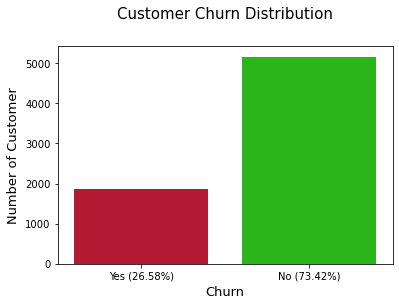

In [16]:
churn_yes = df1['Churn'].value_counts()[1]
churn_no = df1['Churn'].value_counts()[0]
churn_yes_per = churn_yes / df1.shape[0] * 100
churn_no_per = churn_no / df1.shape[0] * 100

print('{} of {} customers did churn and it is the {:.2f}% of the dataset.'.format(churn_yes, df1.shape[0], churn_yes_per))
print('{} of {} customers did not churn and it is the {:.2f}% of the dataset.\n'.format(churn_no, df1.shape[0], churn_no_per))

with sns.color_palette(['#cf0022', '#18cf00']):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df1['Churn'], order=['Yes', 'No'])
    plt.xlabel('Churn', size=13, labelpad=5)
    plt.ylabel('Number of Customer', size=13, labelpad=5)
    plt.xticks((1, 0), ['No ({0:.2f}%)'.format(churn_no_per), 'Yes ({0:.2f}%)'.format(churn_yes_per)])
    plt.title('Customer Churn Distribution', size=15, y=1.10)

plt.show()

#### 1.4.2 Tenure (Continuous Feature)

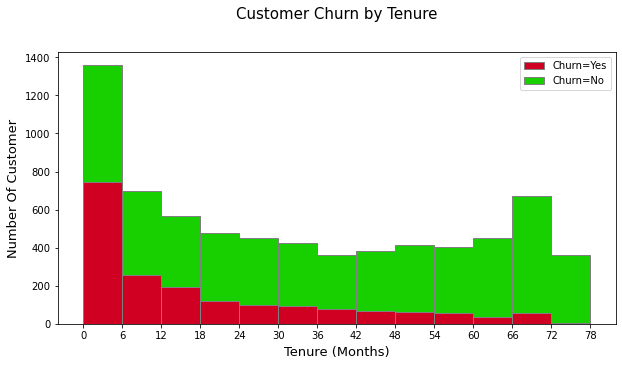

In [17]:
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure.reset_index(drop=True)
tenure_churn_no = df1[df1.Churn=='No'].tenure.reset_index(drop=True)
tenure_churn = df1.tenure.reset_index(drop=True)

with sns.color_palette(['#cf0022', '#18cf00']):
    fig, ax = plt.subplots(figsize=(10,5))
    counts, bins, patches = ax.hist([tenure_churn_yes, tenure_churn_no], bins=[0,6,12,18,24,30,36,42,48,54,60,66,72,78], edgecolor='gray', stacked=True)
    ax.set_xticks(bins.round(0))
    plt.xlabel('Tenure (Months)', size=13, labelpad=5)
    plt.ylabel('Number Of Customer', size=13, labelpad=5)
    plt.title('Customer Churn by Tenure', size=15, y=1.10)
    plt.legend(['Churn=Yes','Churn=No'])

plt.show()

In [136]:
tc_y = df1[df1.Churn=='Yes'].tenure.reset_index(drop=True)
tc_n = df1[df1.Churn=='No'].tenure.reset_index(drop=True)
tenure_churn = df1.tenure.reset_index(drop=True)

tc0 = pd.concat([tc_y, tc_n], axis=1)
tc0.columns = ['churn_yes', 'churn_no']

tc0

,churn_yes,churn_no
0,2.0,1
1,2.0,34
2,8.0,45
3,28.0,22
4,49.0,10
...,...,...
5158,NaN,72
5159,NaN,24
5160,NaN,72
5161,NaN,11


In [139]:
tc_y1 = tc_y.replace(range(0, 7), '0-6').replace(range(7, 13), '7-12').replace(range(13, 19), '13-18').replace(range(19, 25), '19-24').replace(range(25, 31), '25-30').replace(range(31, 37), '31-36').replace(range(37, 43), '37-42').replace(range(43, 49), '43-48').replace(range(49, 55), '49-54').replace(range(55, 61), '55-60').replace(range(61, 67), '61-66').replace(range(67, 73), '67-72').replace(range(73, 79), '73-78')
tc_n1 = tc_n.replace(range(0, 7), '0-6').replace(range(7, 13), '7-12').replace(range(13, 19), '13-18').replace(range(19, 25), '19-24').replace(range(25, 31), '25-30').replace(range(31, 37), '31-36').replace(range(37, 43), '37-42').replace(range(43, 49), '43-48').replace(range(49, 55), '49-54').replace(range(55, 61), '55-60').replace(range(61, 67), '61-66').replace(range(67, 73), '67-72').replace(range(73, 79), '73-78')

tc1 = pd.concat([tc_y1, tc_n1], axis=1)
tc1.columns = ['churn_yes_range', 'churn_no_range']

tc1

,churn_yes_range,churn_no_range
0,0-6,0-6
1,0-6,31-36
2,7-12,43-48
3,25-30,19-24
4,49-54,7-12
...,...,...
5158,NaN,67-72
5159,NaN,19-24
5160,NaN,67-72
5161,NaN,7-12


In [140]:
tc = pd.concat([tc0, tc1], axis=1)

tc

,churn_yes,churn_no,churn_yes_range,churn_no_range
0,2.0,1,0-6,0-6
1,2.0,34,0-6,31-36
2,8.0,45,7-12,43-48
3,28.0,22,25-30,19-24
4,49.0,10,49-54,7-12
...,...,...,...,...
5158,NaN,72,NaN,67-72
5159,NaN,24,NaN,19-24
5160,NaN,72,NaN,67-72
5161,NaN,11,NaN,7-12


In [159]:
print(pd.pivot_table(tc, index='churn_yes_range', columns='churn_yes', aggfunc=len, fill_value=0))

                churn_no                                                    \
churn_yes           1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0 11.0   
churn_yes_range                                                              
0-6                  380  123   94   83   64   40    0    0    0    0    0   
13-18                  0    0    0    0    0    0    0    0    0    0    0   
19-24                  0    0    0    0    0    0    0    0    0    0    0   
25-30                  0    0    0    0    0    0    0    0    0    0    0   
31-36                  0    0    0    0    0    0    0    0    0    0    0   
37-42                  0    0    0    0    0    0    0    0    0    0    0   
43-48                  0    0    0    0    0    0    0    0    0    0    0   
49-54                  0    0    0    0    0    0    0    0    0    0    0   
55-60                  0    0    0    0    0    0    0    0    0    0    0   
61-66                  0    0    0    0    0    0    0    0    0

In [25]:
dfx = pd.DataFrame({
'ord_no':[70001,70009,70002,70004,70007,70005,70008,70010,70003,70012,70011,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
'customer_id':[3005,3001,3002,3009,3005,3007,3002,3004,3009,3008,3003,3002],
'sales_id':[5002,5003,5004,5003,5002,5001,5005,5007,5008,5004,5005,5001]})
print("Original DataFrame:")
print(dfx, "\n")

groups = dfx.groupby([pd.cut(dfx.sales_id, 3), 'customer_id'])
result = groups.size().unstack()
print(result)

Original DataFrame:
    ord_no  purch_amt  customer_id  sales_id
0    70001     150.50         3005      5002
1    70009     270.65         3001      5003
2    70002      65.26         3002      5004
3    70004     110.50         3009      5003
4    70007     948.50         3005      5002
5    70005    2400.60         3007      5001
6    70008    5760.00         3002      5005
7    70010    1983.43         3004      5007
8    70003    2480.40         3009      5008
9    70012     250.45         3008      5004
10   70011      75.29         3003      5005
11   70013    3045.60         3002      5001 

customer_id           3001  3002  3003  3004  3005  3007  3008  3009
sales_id                                                            
(5000.993, 5003.333]     1     1     0     0     2     1     0     1
(5003.333, 5005.667]     0     2     1     0     0     0     1     0
(5005.667, 5008.0]       0     0     0     1     0     0     0     1


* Highest customer churn between 0-10 months
* The more customers tenure, the less customer churn

In [ ]:
# load dataset
df = pd.read_excel("Hours.xls")

# view dataset
print(df)
  
# plot a Stacked Bar Chart using matplotlib
df.plot(
  x = 'Name', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True)
  
df_total = df["Studied"] + df["Slept"] + df["Other"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center', rotation = 20, fontsize = 8)

In [ ]:
i, j = (1, 2)

for i, j in [(1, 2), (3, 4), (5, 6)]:
    print(i, j)

In [ ]:
adj = ["red", "big", "tasty"]
fruits = ["apple", "banana", "cherry"]

for x in adj:
  for y in fruits:
    print(x, y)

In [ ]:
grocery = ['bread', 'milk', 'butter']

for item in grocery:
  print(item)

print('\n')

for count, item in enumerate(grocery):
  print(count, item)

print('\n')

# changing default start value
for count, item in enumerate(grocery, 100):
  print(count, item)

#### 1.4.3 Monthly Charges (Continuous Feature)

In [ ]:
monthlycharges_churn_no = df1[df1.Churn=='No'].MonthlyCharges
monthlycharges_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.figure(figsize=(8, 4))
plt.xlabel('Monthly Charges', size=13, labelpad=5)
plt.ylabel('Number Of Customer', size=13, labelpad=5)
plt.title('Customer Churn by Monthly Charges', size=15, y=1.10)
plt.hist([monthlycharges_churn_yes, monthlycharges_churn_no], bins=10, stacked=True)
plt.legend(['Churn=Yes','Churn=No'])

plt.show()

#### 1.4.4 Total Charges (Continuous Feature)

In [ ]:
totalcharges_churn_no = df1[df1.Churn=='No'].TotalCharges
totalcharges_churn_yes = df1[df1.Churn=='Yes'].TotalCharges

plt.figure(figsize=(8, 4))
plt.xlabel('Total Charges', size=13, labelpad=5)
plt.ylabel('Number Of Customer', size=13, labelpad=5)
plt.title('Customer Churn by Total Charges', size=15, y=1.10)
plt.hist([totalcharges_churn_yes, totalcharges_churn_no], bins=10, stacked=True)
plt.legend(['Churn=Yes','Churn=No'])

plt.show()

### 1.6 Correlations

In [ ]:
df_corr = df1.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr.drop(df_corr.iloc[1::2].index, inplace=True)
df_corr_nd = df_corr.drop(df_corr[df_corr['Correlation Coefficient'] == 1.0].index)

In [ ]:
# Correlations
corr = df_corr_nd['Correlation Coefficient'] > 0.1
df_corr_nd[corr]

In [ ]:
df1.describe()

In [ ]:
df1.describe(include='category')

In [ ]:
#box plot Churn/Tenure
var = 'Churn'
data = pd.concat([df1['tenure'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(3, 5))
fig = sns.boxplot(x=var, y="tenure", data=data)
fig.axis()

g = sns.FacetGrid(df1, col='Churn')
g.map(plt.hist, 'tenure')

In [ ]:
#box plot Churn/MonthlyCharges
var = 'Churn'
data = pd.concat([df1['MonthlyCharges'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(3, 5))
fig = sns.boxplot(x=var, y="MonthlyCharges", data=data)
fig.axis()

g = sns.FacetGrid(df1, col='Churn')
g.map(plt.hist, 'MonthlyCharges')

In [ ]:
#box plot Churn/TotalCharges
var = 'Churn'
data = pd.concat([df1['TotalCharges'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(3, 5))
fig = sns.boxplot(x=var, y="TotalCharges", data=data)
fig.axis()

g = sns.FacetGrid(df1, col='Churn')
g.map(plt.hist, 'TotalCharges')

In [ ]:
df1.groupby(['Churn', 'gender'])['gender'].count()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
df1.groupby(['gender'])['Churn'].apply(lambda x: (x=='Yes').sum()).reset_index(name='count').value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('% Gender Distribution based on Customer Churn')
ax[0].set_ylabel('')
sns.countplot(x='Churn', hue='gender', data=df1, ax=ax[1])
ax[1].set_title('Customer Churn & Gender Distribution')
plt.show()

In [ ]:
# load dataset
df = pd.read_excel("Hours.xls")

# view dataset
print(df)
  
# plot a Stacked Bar Chart using matplotlib
df.plot(
  x = 'Name', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True)
  
df_total = df["Studied"] + df["Slept"] + df["Other"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center', rotation = 20, fontsize = 8)

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure.reset_index(drop=True).to_list()
np.array(tenure_churn_no, dtype='object')

tenure_churn_yes = df1[df1.Churn=='Yes'].tenure.reset_index(drop=True).to_list()
np.array(tenure_churn_yes, dtype='object')

tenure_churn = df1.tenure.reset_index(drop=True).to_list()
np.array(tenure_churn_no, dtype='object')

# Colours for different percentiles
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(10,8))

'''
counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
bins    = numpy.ndarray of bin edge/range values
patches = a list of Patch objects.
        each Patch object contains a Rectnagle object. 
        e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
'''

counts, bins, patches = ax.hist(tenure_churn_yes, edgecolor='gray', bins=[0,6,12,18,24,30,36,42,48,54,60,66,72,78], facecolor=perc_50_colour, stacked=True)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(0))
plt.xticks(rotation=70)

# Set the graph title and axes titles
plt.title('Distribution of randomly generated numbers', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Random Numbers', fontsize=15)

# Change the colors of bars at the edges
twentyfifth, seventyfifth, ninetyfifth = np.percentile(tenure_churn_yes, [25, 75, 95])
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
     
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.53 * np.diff(bins) + bins[:-1]
bin_y_centers = 0.05 * ax.get_yticks()[1]

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,} \n".format(counts[i]) + "({0:,.1f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=70, rotation_mode='anchor')

# Annotation for bar values
ax.annotate('Each bar shows count and percentage of total',
            xy=(.85,.27), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=11, bbox=dict(boxstyle="round", fc="white"),
            rotation=90)

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels = ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

# Display the graph
plt.show()